In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

# Load data from CSV
data = pd.read_csv("filled_data.csv",parse_dates=['Date'])


2024-03-27 10:40:17.768834: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-27 10:40:17.771941: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-27 10:40:17.807212: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-27 10:40:18.987307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# pip install pandas numpy tensorflow keras scikit-learn


In [3]:
data["Date"]=pd.to_datetime(data['Date'],dayfirst=True)

In [4]:
train=data[data['Date']<'2019-01-01']
test=data[data['Date']>='2019-01-01']

In [5]:
train.shape

(5479, 9)

In [6]:
test.shape

(365, 9)

In [7]:
features = [
    "Modal Price (Rs./Quintal)",
    "Rel Humidity at 2 Meters (%) ",
    "Precipitation Corrected (mm/day) ",
    "Surface Soil Wetness",
    "Root Zone Soil Wetness",
    "Temperature at 2 Meters",
]
target = "Modal Price (Rs./Quintal)"

In [8]:
# python -m pip install flask

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler=MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(train[features])
y_train=target_scaler.fit_transform(np.array(train[target]).reshape(-1, 1))

In [10]:
X_test=scaler.transform(test[features])
y_test=target_scaler.transform(np.array(test[target]).reshape(-1,1))

In [11]:
X_test.shape

(365, 6)

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i : (i + look_back), :])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


look_back = 60  # Adjust this based on your data and experiment

X_train_seq, y_train_seq = create_sequences(X_train, look_back)
X_test_seq, y_test_seq = create_sequences(X_test, look_back)

# Define and train the LSTM model
model = Sequential()
model.add(
    LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
)  # Adjust units (50) based on your data and experiment
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq))

# Make predictions on test data
y_pred = model.predict(X_test_seq)



Epoch 1/20


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6:14 2s/step - loss: 0.2055

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1383

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1123

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0982

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0882

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0810

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0752

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0704

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0662

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0626

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0593

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0565

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0539

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0516

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0494

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0475

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0458

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0441

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0427

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0413

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0400

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0388

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0377

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0366

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0357

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0347

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0339

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0330

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0323

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0315

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0308

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0302

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0295

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0289

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0284

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0278

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0273

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0268

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0263

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0259

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0254

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0250

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0246

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0242

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0238

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0234

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0231

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0227

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0224

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0221

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0218

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0215

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0212

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0209

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0206

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0204

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0201

170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0199 - val_loss: 0.0013


Epoch 2/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 7.2245e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.6175e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.8363e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 7.2376e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.4062e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.3558e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.2240e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.1265e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.0289e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.9243e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.8450e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.7773e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.7163e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.6576e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.6119e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.5708e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.5272e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.4890e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.4531e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.4287e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.4199e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.4156e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.4072e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.3988e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.3886e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.3791e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.3733e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.3703e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3708e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3744e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3815e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3848e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3887e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3932e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3969e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3979e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3980e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3965e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3944e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3911e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3862e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3809e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3763e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3706e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3637e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3561e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3498e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3438e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3373e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3300e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3236e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3185e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3140e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3091e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3041e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.2984e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.2922e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 6.2884e-04 - val_loss: 0.0013


Epoch 3/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.4492e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1093e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6770e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.2814e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6161e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.8161e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9043e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9543e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9732e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9812e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9673e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9542e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9373e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9165e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.8991e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.8833e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.8818e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.8841e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9049e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9199e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9320e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9446e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9626e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9810e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.0028e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.0249e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.0452e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.0641e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0809e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0983e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.1150e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.1303e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.1457e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.1589e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.1705e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.1819e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.1902e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.1970e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.2037e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.2096e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.2149e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.2202e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2247e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2279e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2302e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2320e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2333e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2336e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2337e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2336e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2328e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2312e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2291e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2266e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2236e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2203e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2170e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.2151e-04 - val_loss: 7.3412e-04


Epoch 4/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.6582e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0280e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.0275e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.4093e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.5679e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6097e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6093e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6633e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6901e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6936e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6879e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6813e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6981e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.7193e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.7301e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.7344e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.7442e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.7536e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.7709e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.7946e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.8168e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.8381e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.8571e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.8741e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.8916e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9072e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9197e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9282e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9356e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9420e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9458e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9481e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9498e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9508e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9514e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9515e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9501e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9473e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9451e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9440e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9431e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9417e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9407e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9397e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9391e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9387e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9375e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9366e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9352e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9357e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9356e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9357e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9360e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9354e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9344e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9330e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9322e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.9313e-04 - val_loss: 0.0010


Epoch 5/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 2.1652e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2751e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3775e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6366e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7861e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8788e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0160e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1033e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1631e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2092e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2524e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2965e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3288e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3581e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3860e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4135e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4387e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4644e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4908e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5222e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5559e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5838e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6061e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6254e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6432e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6587e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6720e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6835e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6944e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7038e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7123e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7217e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7301e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7421e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7553e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7663e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7756e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7849e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7945e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8036e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8118e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8191e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8250e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8298e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8338e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8371e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8410e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8447e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8477e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8503e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8530e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8555e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8586e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8615e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8645e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8674e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8702e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8730e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.8758e-04 - val_loss: 8.3910e-04


Epoch 6/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.9537e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4598e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8588e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8244e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7336e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6791e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6443e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6183e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6270e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6451e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6663e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6874e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7094e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7328e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7470e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7534e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7576e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7605e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7658e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7706e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7794e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7847e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7893e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7927e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7991e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8048e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8087e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8111e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8134e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8162e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8201e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8225e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8232e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8225e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8208e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8206e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8213e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8229e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8234e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8236e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8228e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8225e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8231e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8238e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8249e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8255e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8261e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8275e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8286e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8295e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8311e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8319e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8329e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8345e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8357e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8367e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8375e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.8381e-04 - val_loss: 7.6855e-04


Epoch 7/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 3.7972e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.3273e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.7050e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.2623e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9081e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6540e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.4834e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.3543e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.2549e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1691e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1021e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.0446e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9913e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.9395e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.9081e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8856e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8650e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8444e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8232e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8109e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8024e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7935e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7846e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7796e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7811e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7804e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7794e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7776e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7770e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7799e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7837e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7870e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7889e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7916e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7955e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8006e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8040e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8064e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8085e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8094e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8094e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8089e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8081e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8065e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8045e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8025e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.8003e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7989e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7975e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7962e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7948e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7932e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7915e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7900e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7886e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7871e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7856e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.7851e-04 - val_loss: 9.1154e-04


Epoch 8/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 6.1065e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6162e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.3841e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.0859e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9421e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8923e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9660e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.0723e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1773e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.2831e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.3796e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.4625e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.5335e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5851e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6257e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6537e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6715e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6866e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6972e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.7004e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6985e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6937e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6878e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6796e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6700e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6616e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6514e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6409e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.6313e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.6219e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.6114e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.6006e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5902e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5802e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5703e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5617e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5531e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5449e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5372e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5298e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5246e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5189e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5126e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5060e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4992e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4918e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4842e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4764e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4686e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4605e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4524e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4446e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4373e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4297e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4219e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4142e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4067e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.4017e-04 - val_loss: 6.0492e-04


Epoch 9/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.3364e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5193e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6913e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8296e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9134e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0365e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1128e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1568e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1801e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1847e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1818e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1807e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1856e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1861e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1945e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1983e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2038e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2063e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2084e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2121e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2176e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2219e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2257e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2307e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2341e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2369e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2395e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2502e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2611e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2710e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2814e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2922e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3019e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3116e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3207e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3298e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3380e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3454e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3526e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3607e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3680e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3751e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3822e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3885e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3939e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3984e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4029e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4076e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4127e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4176e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4224e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4267e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4303e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4335e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4366e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4396e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4423e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.4440e-04 - val_loss: 4.7620e-04


Epoch 10/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 2.0986e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4887e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0150e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1982e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3395e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4480e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4846e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4955e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4895e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4779e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4757e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4805e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4796e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4721e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4605e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4442e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4294e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4142e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3999e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3852e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3710e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3558e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3412e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3264e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3129e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3017e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2920e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2824e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2738e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2667e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2626e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2598e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2588e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2591e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2595e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2592e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2595e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2600e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2598e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2593e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2592e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2586e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2571e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2555e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2545e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2546e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2552e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2555e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2560e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2566e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2576e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2596e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2611e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2622e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2628e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2633e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2634e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.2634e-04 - val_loss: 4.3551e-04


Epoch 11/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 2.0529e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4574e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.3785e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2862e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.2449e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.2189e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1945e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1782e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1743e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1760e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1863e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2063e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2312e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2582e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2881e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3143e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3362e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3537e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3685e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3798e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3939e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4086e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4222e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4354e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4488e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4662e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4843e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5036e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5229e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5436e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5636e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5833e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6033e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6226e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6424e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6614e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6788e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6943e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7087e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7218e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7346e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7462e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7569e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7670e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7765e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7851e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7931e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8006e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8077e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8144e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8211e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8273e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8327e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8380e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8436e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8485e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8527e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.8553e-04 - val_loss: 4.2757e-04


Epoch 12/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.5117e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1334e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3345e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4623e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5250e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5922e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6909e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7820e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8430e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8839e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9104e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9293e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9490e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9574e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9622e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9771e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9875e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9937e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9978e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0003e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0010e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0006e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9997e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9977e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9945e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9932e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9941e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9984e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0050e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0131e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0204e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0263e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0310e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0358e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0389e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0419e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0444e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0459e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0470e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0470e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0464e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0455e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0452e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0450e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0446e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0434e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0420e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0409e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0393e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0378e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0363e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0347e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0327e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0306e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0285e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0262e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0236e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.0218e-04 - val_loss: 7.6964e-04


Epoch 13/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 4.1684e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9656e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8413e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7920e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7648e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7502e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7624e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8050e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8383e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8639e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8819e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9051e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9222e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9298e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9297e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9257e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9209e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9153e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9083e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9058e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9040e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9013e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9013e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9014e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9018e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9010e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8995e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8995e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8995e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8996e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9019e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9048e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9072e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9084e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9090e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9092e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9095e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9095e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9088e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9083e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9075e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9065e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9058e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9047e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9033e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9017e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9000e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8989e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8976e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8960e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8942e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8921e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8898e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8873e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8846e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8816e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8786e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.8767e-04 - val_loss: 4.3645e-04


Epoch 14/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 3.0341e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6372e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5727e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5592e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5416e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5430e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5410e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5346e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5343e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5270e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.5232e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.5203e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5187e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5226e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5288e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5298e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5277e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5266e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5253e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5244e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5239e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5254e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5257e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5278e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5306e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5344e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5378e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5415e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5457e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5491e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5518e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5542e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5586e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5634e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5682e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5743e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5811e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5874e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5936e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5996e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6054e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6106e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6158e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6213e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6263e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6308e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6350e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6388e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6423e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6454e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6487e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6515e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6538e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6561e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6582e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6609e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6634e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.6657e-04 - val_loss: 5.7821e-04


Epoch 15/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 3.3191e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0965e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0511e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2478e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3144e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3545e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3774e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3810e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3690e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3721e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3925e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4057e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4101e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4105e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4033e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3970e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3902e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3838e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3770e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3706e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3643e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3559e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3463e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3398e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3360e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3341e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3302e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3254e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3190e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3109e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3021e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2941e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2863e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2785e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2711e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2633e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2553e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2468e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2384e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2310e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2238e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2166e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2102e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2042e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1993e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1956e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1917e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1880e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1845e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1807e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1767e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1725e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1690e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1654e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1619e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1584e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1550e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.1525e-04 - val_loss: 3.7565e-04


Epoch 16/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 3.4397e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5257e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2734e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2416e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2549e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2711e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2907e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3135e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3340e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3463e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3767e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4080e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4327e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4498e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4635e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4709e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4759e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4778e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4783e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4787e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4799e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4825e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4892e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4943e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4976e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5001e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5004e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5002e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4990e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4971e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4952e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4937e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4931e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4940e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4963e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4985e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4996e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5000e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5006e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5012e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5020e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5025e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5024e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5018e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5007e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4994e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4980e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4966e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4951e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4942e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4933e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4923e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4914e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4906e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4897e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4887e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4876e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.4868e-04 - val_loss: 3.4200e-04


Epoch 17/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.0304e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.6097e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.7308e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.8115e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.8254e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.8650e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.9106e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.9510e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0239e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0913e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1396e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1736e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1962e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2127e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2255e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2352e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2430e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2512e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2570e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2598e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2612e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2621e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2626e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2625e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2618e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2598e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2570e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2544e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2526e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2511e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2500e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2492e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2494e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2504e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2514e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2535e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2577e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2629e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2684e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2751e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2817e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2882e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2946e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3003e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3056e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3103e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3142e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3180e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3217e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3258e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3296e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3332e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3368e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3400e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3429e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3456e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3479e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.3491e-04 - val_loss: 4.3643e-04


Epoch 18/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.1222e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.6240e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.7275e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.8713e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.9831e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0504e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0914e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1149e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1413e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1637e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1930e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2141e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2305e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2385e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2422e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2421e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2399e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2372e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2345e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2349e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2373e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2371e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2343e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2340e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2333e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2327e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2318e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2315e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2337e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2368e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2406e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2447e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2489e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2528e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2565e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2601e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2631e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2658e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2680e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2697e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2709e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2719e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2729e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2741e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2757e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2773e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2792e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2811e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2829e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2843e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2853e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2861e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2868e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2871e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2871e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2871e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2870e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.2873e-04 - val_loss: 3.7246e-04


Epoch 19/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.3574e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2188e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4512e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6331e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7765e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8689e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9457e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0396e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0918e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1201e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1309e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1409e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1406e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1530e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1558e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1501e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1395e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1249e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1083e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0919e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0741e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0558e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0371e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0184e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0010e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9836e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9681e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9531e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9380e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9227e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9076e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8940e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8815e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8702e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8591e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8485e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8387e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8287e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8183e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8081e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7978e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7888e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7798e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7711e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7624e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7539e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7459e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7379e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7304e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7230e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7158e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7096e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7034e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6974e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6914e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6855e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6798e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.6759e-04 - val_loss: 6.3505e-04


Epoch 20/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.5936e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2203e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6357e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7313e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8013e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8537e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8559e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8383e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8033e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7586e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7135e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6723e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6288e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5889e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5521e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5263e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5089e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4965e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4862e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4780e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4723e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4691e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4674e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4652e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4632e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4619e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4609e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4594e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4578e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4574e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4579e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4585e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4590e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4595e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4604e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4617e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4640e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4675e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4724e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4773e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4827e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4881e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4931e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4981e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5029e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5069e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5105e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5143e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5179e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5209e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5237e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5261e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5284e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5302e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5315e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5326e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5335e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.5339e-04 - val_loss: 3.4711e-04


 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step

 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [13]:
len(X_test)

365

In [14]:
y_pred = y_pred.reshape(-1)

In [15]:
y_pred_scaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_seq = y_test_seq.reshape(-1)
y_test_scaled = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))


In [16]:
len(y_pred_scaled)

304

In [17]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 78.62


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred_scaled[0]

array([3492.145], dtype=float32)

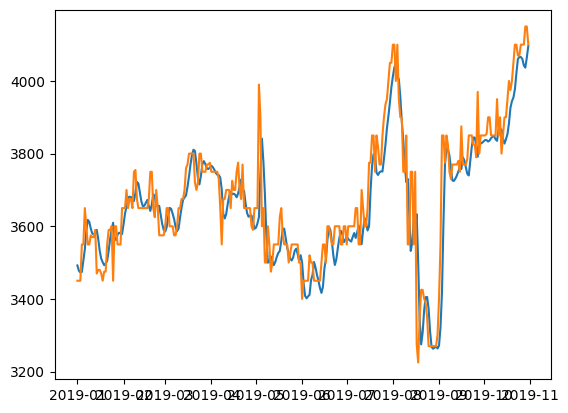

In [19]:
import matplotlib.pyplot as plt
plt.plot(test['Date'][0:304],y_pred_scaled.reshape(-1))
plt.plot(test['Date'][0:304],y_test_scaled.reshape(-1))

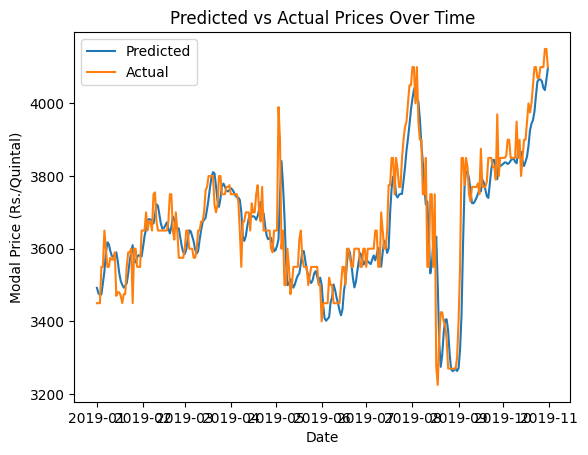

In [20]:

# Define the date range for plotting
date_range = test['Date'].iloc[:len(y_pred_scaled)]

# Plot the predictions against the actual values over time
plt.plot(date_range, y_pred_scaled, label='Predicted')
plt.plot(date_range, y_test_scaled, label='Actual')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time')
plt.legend()

# Show plot
plt.show()

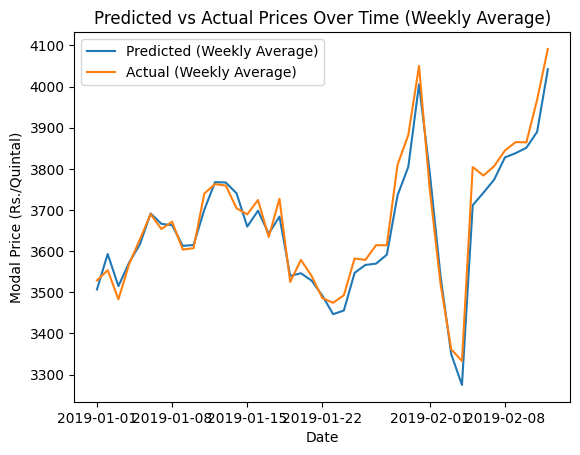

In [21]:
# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)


# Plot the weekly average predictions against the actual values
plt.plot(test['Date'][:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test['Date'][:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()
plt.savefig("static/my_plot1.png")
# Show plot
plt.show()

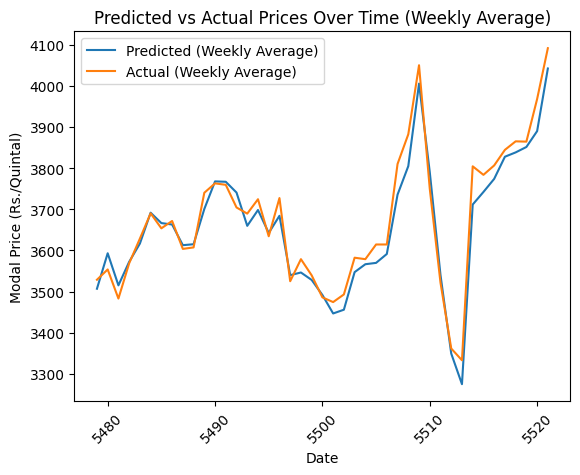

In [22]:

# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)

# Plot the weekly average predictions against the actual values
plt.plot(test.index[:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test.index[:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.savefig('static/my_plot.png')
# Show plot
plt.show()

In [23]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import row, column
from bokeh.models.widgets import TextInput
from bokeh.models import CustomJS

# Define Bokeh plots
plot1 = figure(title="Predicted vs Actual Prices Over Time",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

plot2 = figure(title="Predicted vs Actual Prices Over Time (Weekly Average)",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

# Add data to plots
source1 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_scaled)],
                                     predicted=y_pred_scaled.reshape(-1),
                                     actual=y_test_scaled.reshape(-1)))
plot1.line(x='date', y='predicted', source=source1, legend_label='Predicted', color='blue')
plot1.line(x='date', y='actual', source=source1, legend_label='Actual', color='orange')

source2 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_weekly)],
                                     predicted_weekly=y_pred_weekly,
                                     actual_weekly=y_test_weekly))
plot2.line(x='date', y='predicted_weekly', source=source2, legend_label='Predicted (Weekly Average)', color='blue')
plot2.line(x='date', y='actual_weekly', source=source2, legend_label='Actual (Weekly Average)', color='orange')

# Add hover tooltips
hover_tool1 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted"), ("Actual", "@actual")],
                        formatters={"@date": "datetime"})
plot1.add_tools(hover_tool1)

hover_tool2 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted_weekly"), ("Actual", "@actual_weekly")],
                        formatters={"@date": "datetime"})
plot2.add_tools(hover_tool2)

# Define dashboard layout
dashboard_layout = column(plot1, plot2)

# Save and show the dashboard
output_file("index.html")
show(dashboard_layout)
